# Training a CNN to Classify Images based on Their Rating

In [1]:
from collections import Counter
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
import csv, cv2, matplotlib.pyplot as plt, numpy as np, tensorflow as tf

## Load Roughly an Equal Number of Safe and Explicit Images

In [4]:
filename = ".\\data.csv"

post_ids = []
labels = []

with open(filename, 'r') as fp:
	reader = csv.reader(fp)

	headings = next(reader)

	for row in reader:
		match row[2]:
			case "Safe":
				if np.random.random() < 0.1:
					post_ids.append(row[0])
					labels.append(row[2])
			case "Explicit":
				post_ids.append(row[0])
				labels.append(row[2])

## Loading and Preprocessing the Data

In [5]:
all_imgs = np.array([cv2.imread(f"images\\{post_id}.jpg") for post_id in post_ids], dtype=np.float64) / 255
d = {"Safe": 0, "Questionable": 2, "Explicit": 1}
labels = np.array([d[label] for label in labels])
print(Counter(labels))

Counter({0: 7489, 1: 7458})


In [6]:
print(all_imgs.shape)
print(labels.shape)
print(all_imgs[:2, :2, :2])

(14947, 128, 128, 3)
(14947,)
[[[[1.         0.4        0.23921569]
   [0.95686275 0.45490196 0.34117647]]

  [[0.96862745 0.4627451  0.33333333]
   [0.74509804 0.33333333 0.25098039]]]


 [[[0.61176471 0.64705882 0.29019608]
   [0.56470588 0.63137255 0.2745098 ]]

  [[0.60392157 0.65098039 0.30588235]
   [0.55686275 0.63529412 0.28627451]]]]


In [7]:
training_imgs, test_imgs, training_labels, test_labels = train_test_split(all_imgs, labels, train_size=0.8)

## Building the Model

In [8]:
model = Sequential()
model.add(tf.keras.Input(shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(3, activation="softmax"))

model.compile(optimizer="adam",
			  loss="sparse_categorical_crossentropy",
			  metrics=["accuracy"])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 62, 62, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,922,755 (49.30 MB)

 Trainable params: 12,922,755 (49.30 MB)

 Non-trainable params: 0 (0.00 B)

## Training and Testing the Model

In [9]:
epochs = 5
batch_size = 32
history = model.fit(training_imgs, training_labels, epochs=epochs, batch_size=batch_size,
					validation_data=(test_imgs, test_labels)).history
# history = model.fit(training_imgs, training_labels, epochs=epochs, batch_size=batch_size, verbose=1).history

Epoch 1/5
374/374 ━━━━━━━━━━━━━━━━━━━━ 52s 135ms/step - accuracy: 0.6030 - loss: 0.7643 - val_accuracy: 0.6214 - val_loss: 0.6334
Epoch 2/5
374/374 ━━━━━━━━━━━━━━━━━━━━ 49s 132ms/step - accuracy: 0.7178 - loss: 0.5592 - val_accuracy: 0.7368 - val_loss: 0.5217
Epoch 3/5
374/374 ━━━━━━━━━━━━━━━━━━━━ 49s 132ms/step - accuracy: 0.7374 - loss: 0.5268 - val_accuracy: 0.6829 - val_loss: 0.6003
Epoch 4/5
374/374 ━━━━━━━━━━━━━━━━━━━━ 50s 133ms/step - accuracy: 0.7592 - loss: 0.4941 - val_accuracy: 0.7448 - val_loss: 0.5087
Epoch 5/5
374/374 ━━━━━━━━━━━━━━━━━━━━ 50s 134ms/step - accuracy: 0.7680 - loss: 0.4802 - val_accuracy: 0.7508 - val_loss: 0.5030


## Results

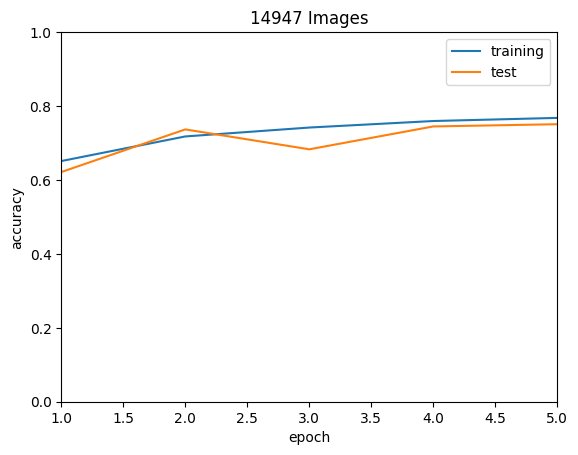

In [10]:
plt.plot(range(1, epochs + 1), history["accuracy"], label="training")
plt.plot(range(1, epochs + 1), history["val_accuracy"], label="test")
plt.title(f"{labels.size} Images")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.xlim((1, epochs))
plt.ylim(0, 1)
plt.legend()
plt.show()